In [3]:
import os
import pandas as pd

In [4]:
os.chdir('C:\Springboard\Github\Ch26_2_Relax')

In [5]:
# import the user file
df1 = pd.read_csv(r'takehome_users.csv', engine='python')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df1.shape

(12000, 10)

In [7]:
# import the user data file
df2 = pd.read_csv(r'takehome_user_engagement.csv', engine='python')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df2.shape

(207917, 3)

before merging these DF's, why don't we pair down this df2 to just the information that we need:
If a particular user has logged in more than 3 days in a 7 day period

In [9]:
# how do I do this?
df3 = df2.melt(id_vars=['user_id'], value_vars=['time_stamp'])
df3

,user_id,variable,value
0,1,time_stamp,2014-04-22 03:53:30
1,2,time_stamp,2013-11-15 03:45:04
2,2,time_stamp,2013-11-29 03:45:04
3,2,time_stamp,2013-12-09 03:45:04
4,2,time_stamp,2013-12-25 03:45:04
...,...,...,...
207912,11996,time_stamp,2013-09-06 06:14:15
207913,11997,time_stamp,2013-01-15 18:28:37
207914,11998,time_stamp,2014-04-27 12:45:16
207915,11999,time_stamp,2012-06-02 11:55:59


In [10]:
df_repeat = df3.groupby('user_id').count()
df_repeat

,variable,value
user_id,,
1,1,1
2,14,14
3,1,1
4,1,1
5,1,1
...,...,...
11996,1,1
11997,1,1
11998,1,1


In [11]:
df_repeat = df_repeat[df_repeat['variable'] > 2]
df_repeat.index

Int64Index([    2,    10,    20,    33,    42,    43,    50,    53,    59,
               60,
            ...
            11961, 11964, 11965, 11967, 11969, 11975, 11980, 11981, 11988,
            11991],
           dtype='int64', name='user_id', length=2248)

That gives us a list of the user that have logged in more than 3 times total, but now we need to narrow that down to the users that have logged in 3 times in the same week. How do I do that? <br>
Let's apply that list to the dataframe of logins to start

In [12]:
df2 = df2[df2['user_id'].isin(df_repeat.index)]
df2

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


That didn't do much, as we only dropped 6,000 rows from the 207,000 that we started with.

# back to the original question: how do we get the user_id as the index and the time_stamp as columns?
# pivot table?
# join the dataframe on itself?


Both DF's are loaded; we need to merge these 2 DF's. <br>
Before we merge, we need to make the columns the same name

In [13]:
df1.rename(columns={'object_id':'user_id'}, inplace=True)

In [14]:
df1.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [15]:
df = df1.merge(df2, how='left', on='user_id')
df.shape

(210754, 12)

In [16]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1.0


Now, I will groupby username and week so that we can see if a user exceeded 3 logins in any week <br>
Before doing that, let's drop the rows that have no value for 'visited'

In [23]:
df.dropna(subset=['visited', 'time_stamp'], how='any', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 210744
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     201002 non-null  int64  
 1   creation_time               201002 non-null  object 
 2   name                        201002 non-null  object 
 3   email                       201002 non-null  object 
 4   creation_source             201002 non-null  object 
 5   last_session_creation_time  201002 non-null  float64
 6   opted_in_to_mailing_list    201002 non-null  int64  
 7   enabled_for_marketing_drip  201002 non-null  int64  
 8   org_id                      201002 non-null  int64  
 9   invited_by_user_id          113198 non-null  float64
 10  time_stamp                  201002 non-null  object 
 11  visited                     201002 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 19.9+ MB


In [26]:
# time_stamp needs to be in datetime for this to work
df['time_stamp'] = pd.to_datetime(df['time_stamp'], infer_datetime_format=True)

In [33]:
dfc = df.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')]).sum()
dfc.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
count,6.193300e+04,61933.000000,61933.000000,61933.000000,61933.000000,61933.000000
mean,4.544532e+09,0.838600,0.501913,536.349103,10916.429351,3.245475
std,2.832690e+09,1.737908,1.410698,578.278589,16040.292480,2.019303
min,1.339706e+09,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.401903e+09,0.000000,0.000000,120.000000,0.000000,1.000000
50%,4.203628e+09,0.000000,0.000000,325.000000,3178.000000,3.000000
75%,7.006319e+09,1.000000,0.000000,750.000000,16364.000000,5.000000
max,9.813474e+09,7.000000,7.000000,2905.000000,83720.000000,7.000000


Awesome! This gives us the users and how many times they visited in a particular week. Now, we just need to filter those for users that have a max greater than 2 (I hope).

In [36]:
# filter for weeks that have greater than 2 visits
dfc = dfc[dfc['visited'] > 2]
# groupby user_id to see how many user have at least one week that qualifies
dfc = dfc.groupby('user_id')['visited'].max()
dfc

user_id
2        3.0
10       7.0
20       3.0
33       3.0
42       7.0
        ... 
11965    3.0
11967    6.0
11969    7.0
11975    7.0
11988    5.0
Name: visited, Length: 1445, dtype: float64

That is our list of user ID's that logged in at least 3 times in some week; we'll apply that list to the original list of users to produce our target value of 'acquired'

In [38]:
dfc.index

Int64Index([    2,    10,    20,    33,    42,    43,    53,    63,    69,
               74,
            ...
            11957, 11958, 11959, 11961, 11964, 11965, 11967, 11969, 11975,
            11988],
           dtype='int64', name='user_id', length=1445)

In [39]:
df1['acquired'] = df['user_id'].isin(dfc.index)

In [43]:
# fill the Nan values in 'acquired'
df1['acquired'].fillna(value=False, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  acquired                    12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


The user ID of somebody that invited somebody else maybe important if we wanted to do more complicated analysis, but the fact that they were invited maybe more pertinent. Let's change that to a booleen.

In [52]:
df1['invited'] = ~df1['invited_by_user_id'].isna()

In [55]:
# we also need to change creation_time to datetime
df1['creation_time'] = pd.to_datetime(df['creation_time'], infer_datetime_format=True)

I also want to create one more feature: recommended. <br>
If the user recommended the service, that user may be more likely to be adopted

In [62]:
df1['recommended'] = df['user_id'].isin(df['invited_by_user_id'])
df1['recommended'].value_counts()

False    9710
True     1706
Name: recommended, dtype: int64

Let's see how this works out in PPS

In [63]:
import ppscore as pps
import seaborn as sns
df_pps = pps.matrix(df1)

C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


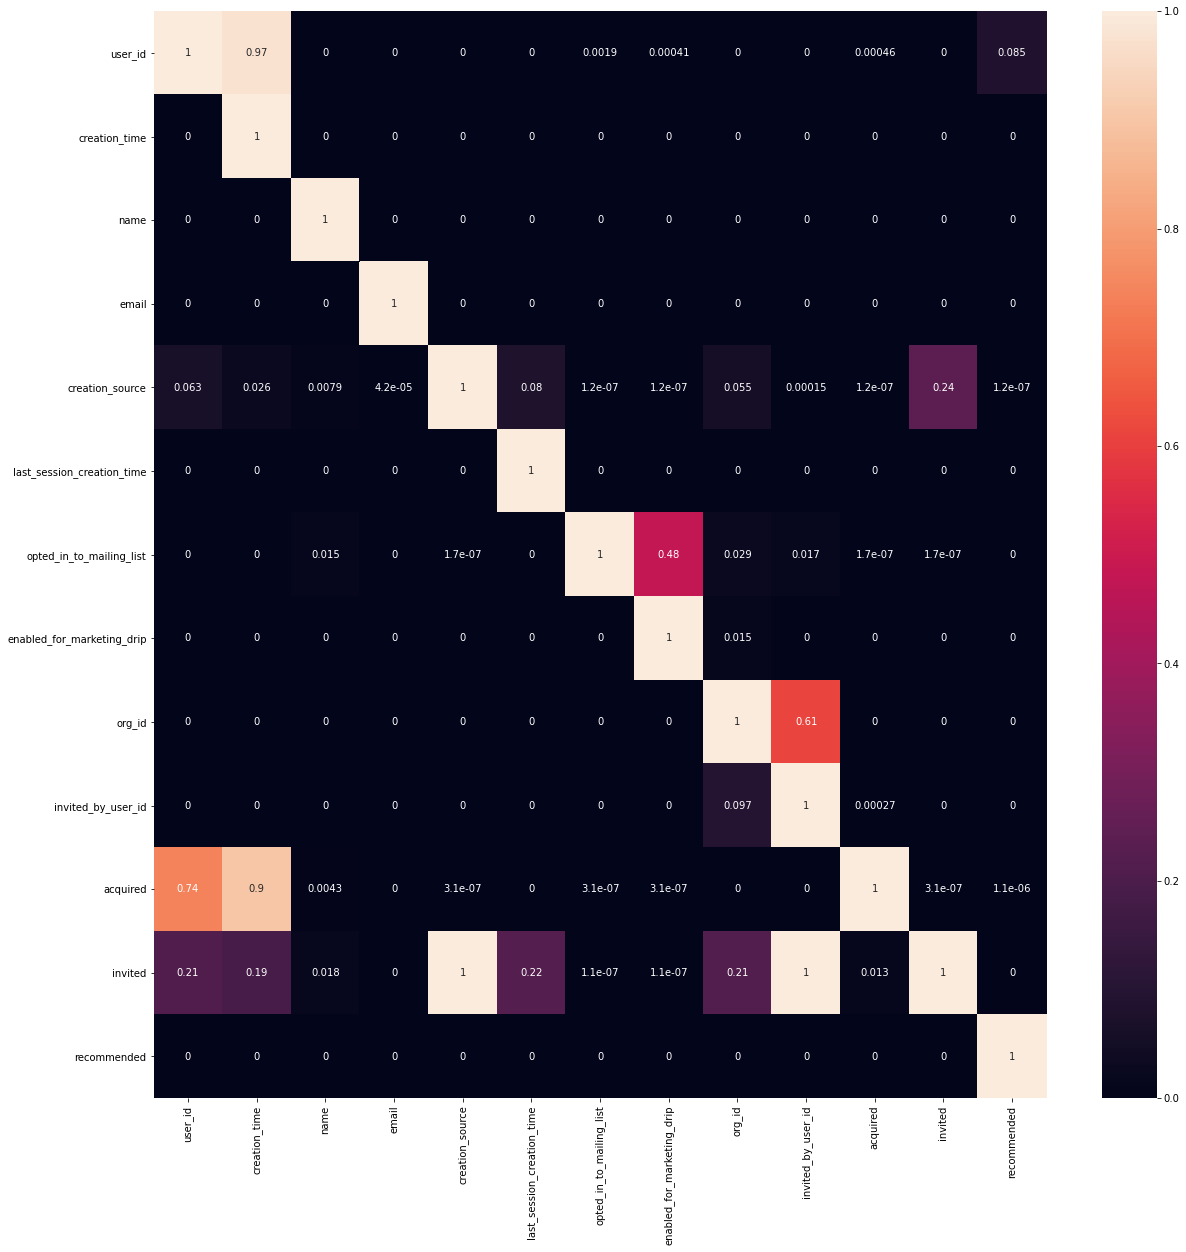

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(df_pps, annot=True, ax=ax)
plt.savefig("PPS_relax2.jpg")

Wow. When looking at whether the customers were acquired in the PPS, the only feature that shows any real effect is the user_id. 

In [66]:
df1['acquired'].replace(to_replace=[True, False], value=[1,0], inplace=True)
df1['recommended'].replace(to_replace=[True, False], value=[1,0], inplace=True)
df1['invited'].replace(to_replace=[True, False], value=[1,0], inplace=True)

Let's look at the correlation coefficient

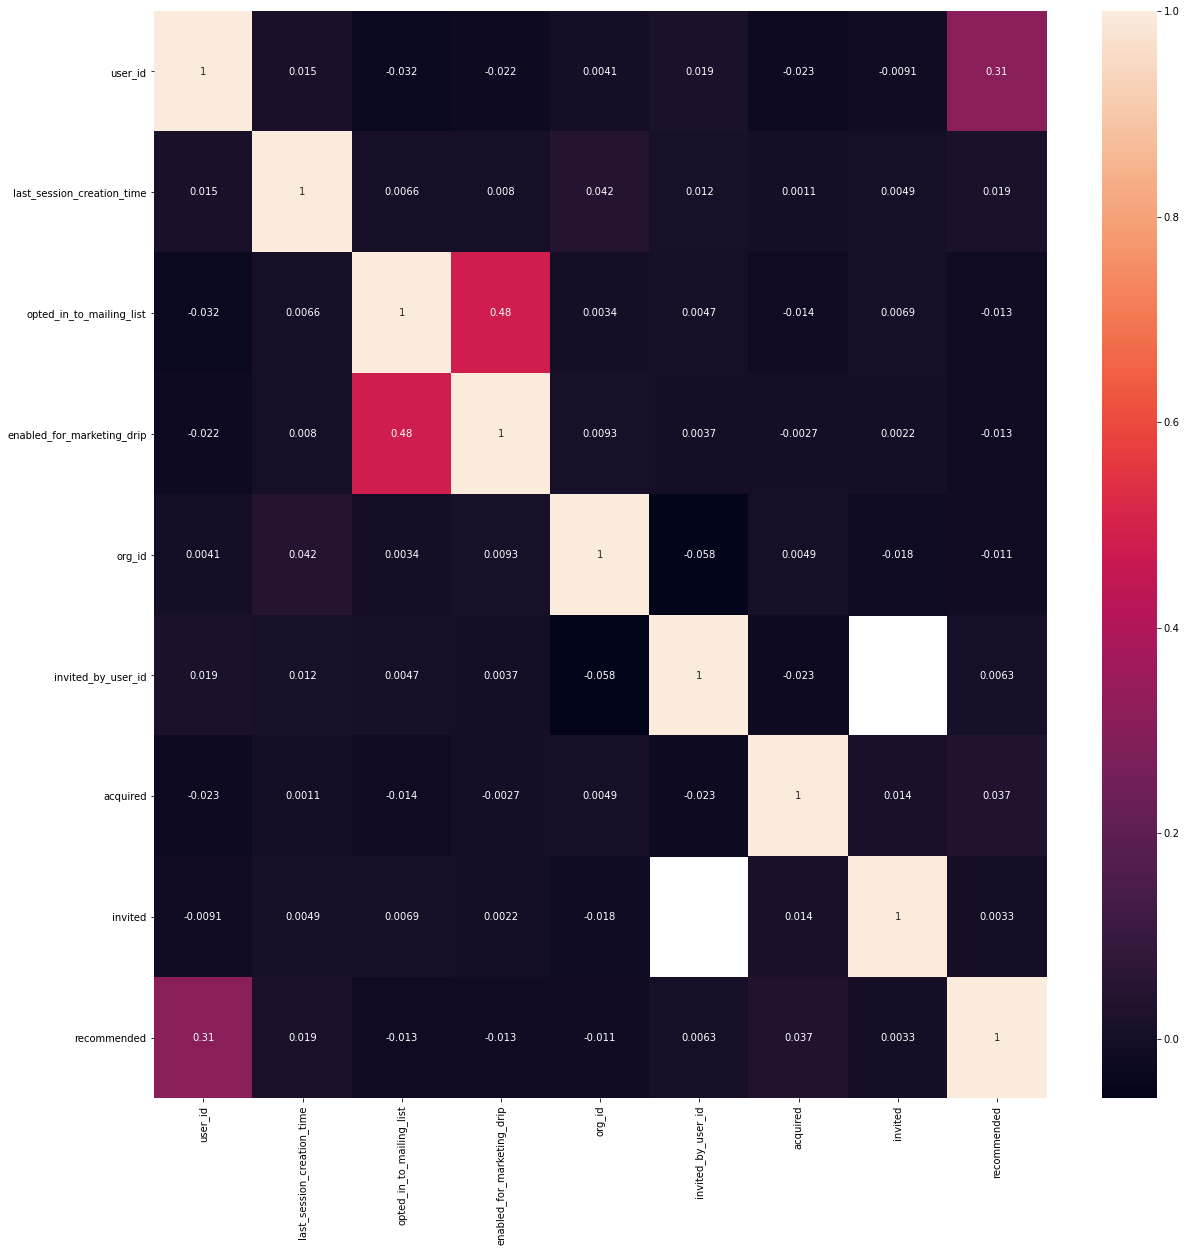

In [67]:
df_corr = df1.corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(df_corr, annot=True, ax=ax)

We'll end the analysis there. If I were to investigate this further, I believe that we should also investigate if a user invited someone else to join. That may be a VERY significant factor in determining if a user was acquired - if they are willing to invite somebody else to join.